# Retail Sales Record Analysis
- Finding areas to target to optimize profit
- Identify operation-related issues

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('SampleSuperstore.csv')

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [7]:
df.corr()['Profit'].sort_values()

Discount      -0.219487
Postal Code   -0.029961
Quantity       0.066253
Sales          0.479064
Profit         1.000000
Name: Profit, dtype: float64

## Exploratory Data Analysis (EDA)

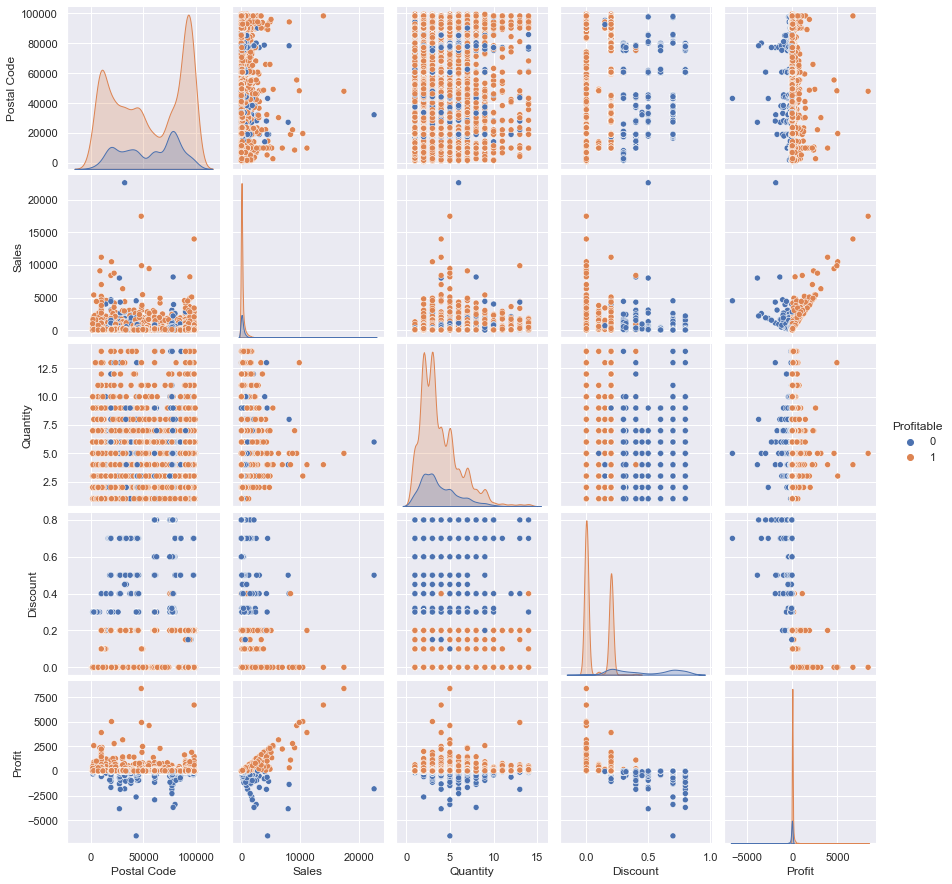

In [107]:
df['Profitable'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)
sns.pairplot(df, hue='Profitable')

The above pairplot shows some general pattern that differentiate between chain stores that are profitable or not. A chain that is profitable are chains that are generating profit and vice versa. From the above pattern, we can see that there are some separation between profitable and non-profitable chains on some features. One particular feature to be explored is the 'Discount' amount which will be analyzed later on.

First, let's see how the Net Sales compares per different Region. The region divides the country into 4 different categories of regions. This shows the level of contribution to profit per different regions

In [90]:
%matplotlib inline
sns.set(rc={'figure.figsize':(12,5)})

#### Exploring Profitability Per Region

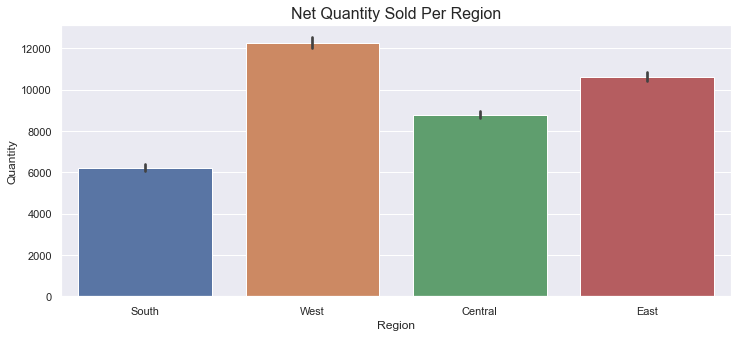

In [104]:
sns.barplot(x='Region', y='Quantity', data=df, estimator=sum)
plt.title('Net Quantity Sold Per Region', size=16)
plt.show()

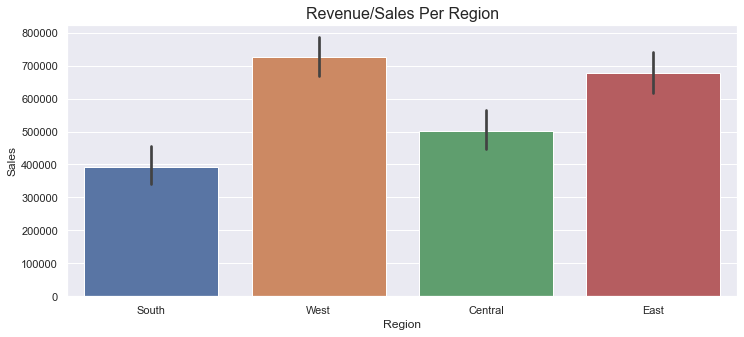

In [99]:
sns.barplot(x='Region', y='Sales', data=df, estimator=sum)
plt.title('Revenue/Sales Per Region', size=16)
plt.show()

Based on the chart above, the South and Central value tend to have the lowest sales revenue

Text(0.5, 1.0, 'Profit Per Region')

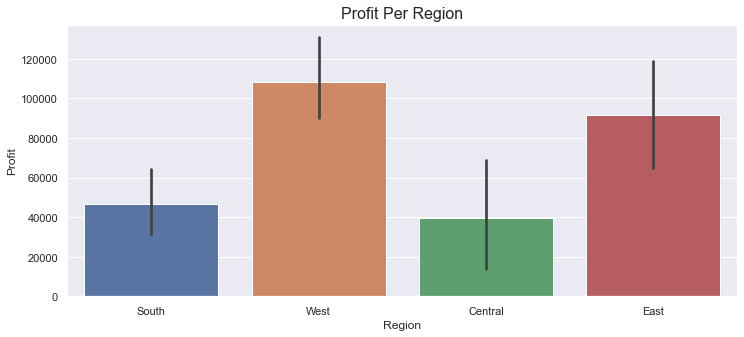

In [97]:
sns.barplot(x='Region', y='Profit', data=df, estimator=sum)
plt.title('Profit Per Region', size=16)

It is again shown above that the profit ultimately follows the same pattern as the revenue(Sales). This does not reveal a lot of information. One way to really compare the regions is to determine the profit margin ratio or the proportion of profit in terms of sales. This would reveal how efficient a region is in converting those sales revenue into profit

Text(0.5, 1.0, 'Profit Margin Ratio Per Region')

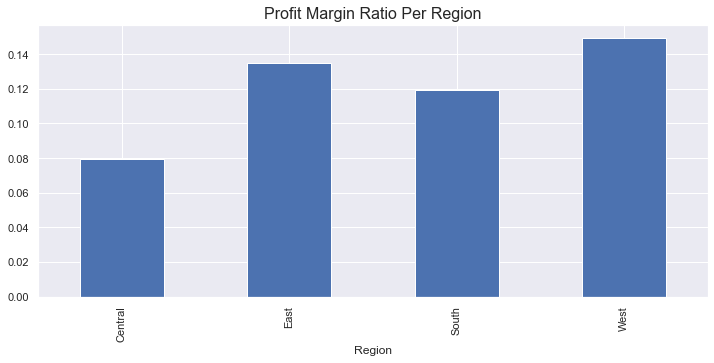

In [100]:
(df.groupby('Region').sum()['Profit'] / df.groupby('Region').sum()['Sales']).plot(kind='bar')
plt.title('Profit Margin Ratio Per Region', size=16)

From the above chart, we can see that the Central region has the least proportion of profit in terms of sales or in other word the least profit margin ratio. Despite having higher sales revenue than the South region, the Central value tends to have lower profit. This implies an inefficient cost management for the chains located in the Central region in general, or a few ones that perform terribly.

<AxesSubplot:xlabel='Region', ylabel='Profit'>

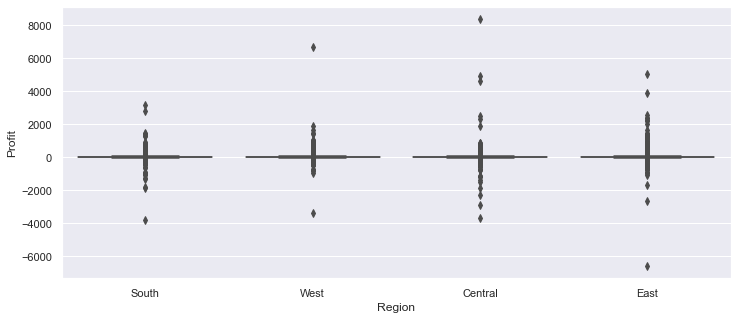

In [12]:
sns.boxplot(x='Region', y='Profit', data=df)

From the above distribution of Profit, it seems that there are several of the chain stores in the Central regions that are making large profit. However, this is accompanied by a several chains that are also losing money. Let's focus on the Central Region. We can go into more detail to determine the performance per State within the region.

In [13]:
figure_per_central_states = df.groupby(['Region','State']).sum().loc['Central'][['Sales', 'Profit']].sort_values(by='Profit')
figure_per_central_states

,Sales,Profit
State,,
Texas,170188.0458,-25729.3563
Illinois,80166.1010,-12607.8870
North Dakota,919.9100,230.1497
South Dakota,1315.5600,394.8283
Kansas,2914.3100,836.4435
Iowa,4579.7600,1183.8119
Nebraska,7464.9300,2037.0942
Oklahoma,19683.3900,4853.9560
Missouri,22205.1500,6436.2105


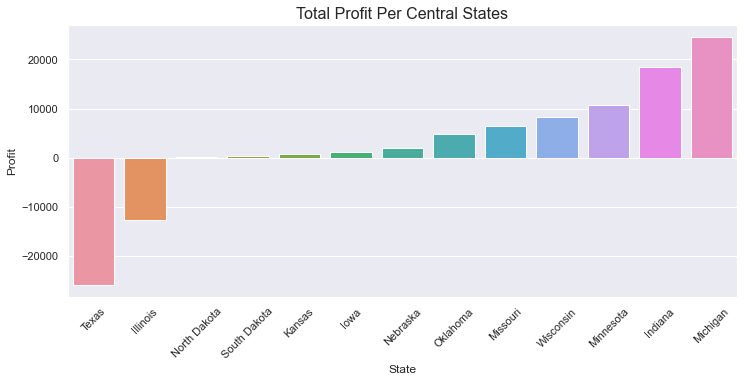

In [102]:
sns.barplot(x=figure_per_central_states.index ,y='Profit', data=figure_per_central_states)
plt.xticks(rotation=45)
plt.title('Total Profit Per Central States', size=16)
plt.show()

Based on the above, it seems that Texas and Illinois are generating loss while the majority are gaining profit. However, let's look at the Profit Margin to get a clearer picture.

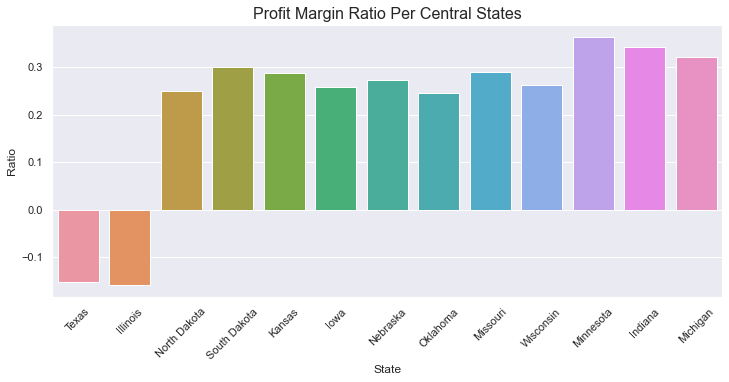

In [101]:
figure_per_central_states['Ratio'] = figure_per_central_states['Profit'] / figure_per_central_states['Sales']
sns.barplot(x=figure_per_central_states.index ,y='Ratio', data=figure_per_central_states)
plt.xticks(rotation=45)
plt.title('Profit Margin Ratio Per Central States', size=16)
plt.show()

Based on the above, the proportion of profit per revenue for each state can be explained through the profit margin ratio. As seen above, the ratio seems to be more or less equal for most of the states excluding Texas and Illinois. Let's identify which City are generating losses in these States. Most specifically, let's look at the top 20% of the worst performing cities in the Central Region

<AxesSubplot:xlabel='Profit', ylabel='City'>

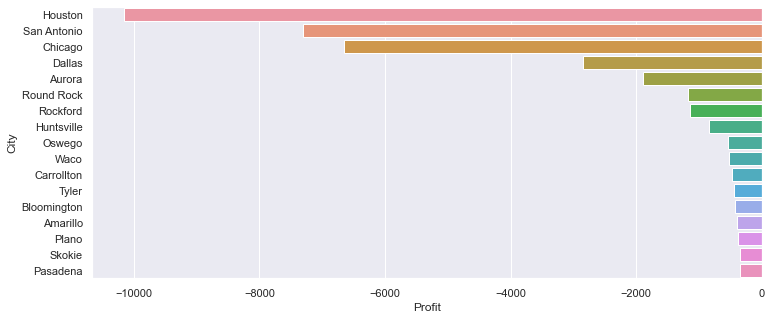

In [20]:
illinois_and_Texas_figure = df[(df['State'] == 'Texas') | (df['State'] == 'Illinois')].groupby('City').sum().sort_values(by="Profit")
# illinois_and_Texas_figure.head()
sns.barplot(y=illinois_and_Texas_figure[:17].index, x='Profit', data=illinois_and_Texas_figure[:17])

The above charts seems to be counterintuitive for these chains. It seems that the more Sales revenue generated, the lower the Profit. One way to explain is that these chains are focusing too much on generating revenue and not enough on their cost structure.

#### Exploring Product Category

Let's also understand which category is selling the most in general before focusing on particular regions.

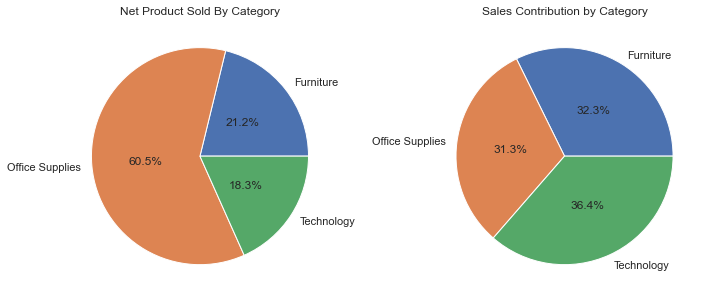

In [19]:
data = df.groupby('Category').sum()['Quantity']
pie, ax = plt.subplots(nrows= 1, ncols=2, figsize=[10,6])

quantity_labels = data.keys()
ax[0].pie(x=data, autopct="%.1f%%", labels=quantity_labels, pctdistance=0.5)
ax[0].title.set_text("Net Product Sold By Category");

sales_contribution = df.groupby('Category').sum()['Sales']
sales_labels = sales_contribution.keys()
ax[1].pie(x=sales_contribution, autopct="%.1f%%", labels=sales_labels, pctdistance=0.5)
ax[1].title.set_text("Sales Contribution by Category");

pie.tight_layout()

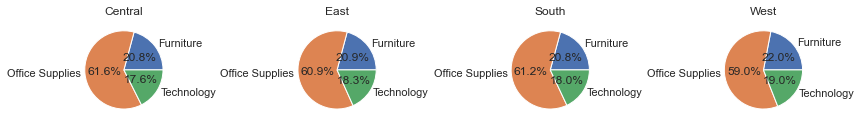

In [50]:
data = df.groupby(['Region','Category']).sum()['Quantity']
pie, ax = plt.subplots(nrows= 1, ncols=4, figsize=[12,5])

regions = data.index.get_level_values(0).unique()


for i, region in enumerate(regions):
    data_i =  data.loc[region]
    quantity_labels = data_i.keys()
    ax[i].pie(x=data_i, autopct="%.1f%%", labels=quantity_labels, pctdistance=0.5)
    ax[i].title.set_text(f"{region}");
    
pie.tight_layout()

Based on the above chart, it seems that each region are selling similar proportion of category of goods

#### Exploring the Discount Feature

As mentioned above, the Discount feature seems to be a differentiating factor to profitability. Let's examine more closely on the discount factor

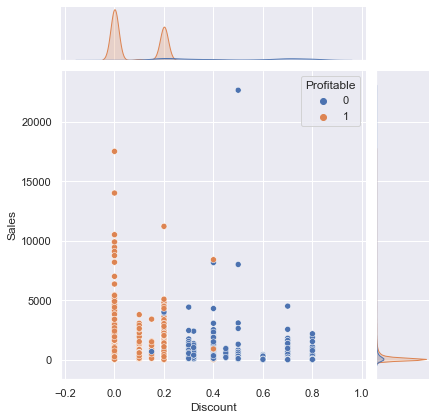

In [57]:
sns.jointplot(x='Discount', y='Sales', data=df, hue='Profitable')

<AxesSubplot:>

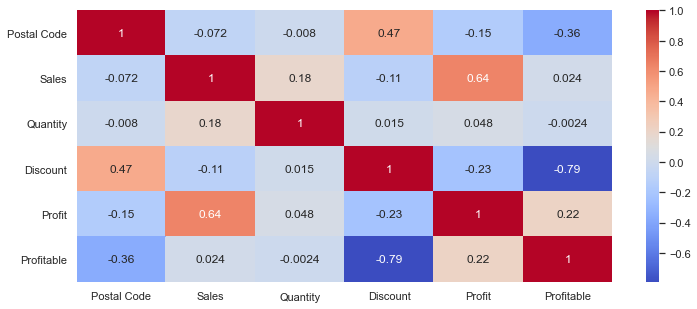

In [83]:
sns.heatmap(df[df['Region'] == 'Central'].corr(), cmap='coolwarm', annot=True)

As seen above, the stores in the Central seems to have a  negative correlation between Profit and Discount feature. One possible reason that discounts are implemented is to increase the number of sales/quantity. Let's see if this is effective

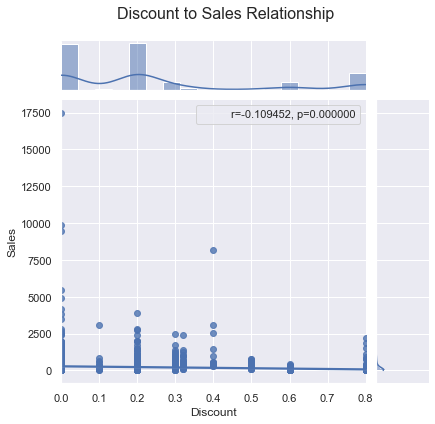

In [144]:
graph = sns.jointplot(x='Discount', y='Sales', kind='reg', data=df[df['Region'] == 'Central'])
r, p = stats.pearsonr(df[df['Region'] == 'Central']['Discount'], df[df['Region'] == 'Central']['Sales'])
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
graph.fig.subplots_adjust(top=0.90)
plt.suptitle("Discount to Sales Relationship", size=16)
plt.show()

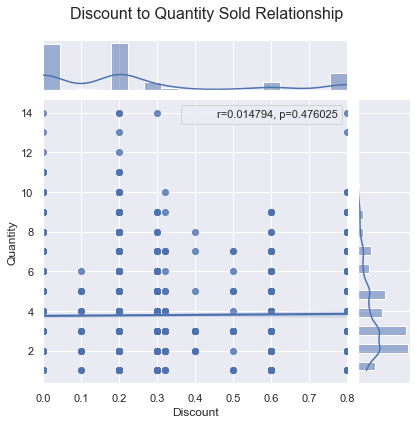

In [145]:
graph = sns.jointplot(x='Discount', y='Quantity', kind='reg', data=df[df['Region'] == 'Central'])
r, p = stats.pearsonr(df[df['Region'] == 'Central']['Discount'], df[df['Region'] == 'Central']['Quantity'])
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
graph.fig.subplots_adjust(top=0.90)
plt.suptitle("Discount to Quantity Sold Relationship", size=16)
plt.show()

From the two above value, it seems that the discounts are negatively correlated with Sales value, and only unremarkably positively correlated with Quantity. This implies that the discounts are not largely contributing to a great increase in quantity sold nor sales amount

Text(0.5, 1.0, 'Profit and Discount Correlation Graph')

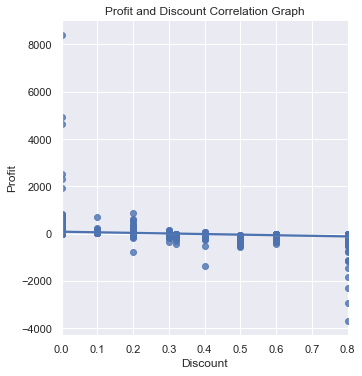

In [109]:
sns.lmplot(x='Discount', y='Profit', data=df[df['Region'] == 'Central'])
plt.title('Profit and Discount Correlation Graph')

## Suggestions

###### 1. Attempt to control and optimize cost structure in each of the stores particularly the stores in the Central Region
###### 2. Reduce the Discount Rate for the stores in particular the Central Region where a higher discount is doing the store more harm than benefit